In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('../paper.mplstyle')

# from solar_common import datadir

from glob import glob

In [2]:
livetime = 3186.1*24*2600 # livetime in seconds

In [3]:
from solar_common.mc_reader import MCReader

In [4]:
yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
dist = None
for yr in yrr:
    fs = glob('/data/user/jlazar/solar/data//distributions/IC86_%d_exp_*.npy' % yr)
    for f in fs:
        if dist is None:
            dist = np.divide(np.load(f), len(fs))
        else:
            dist += np.divide(np.load(f), len(fs))
            
dist=resum_arr(dist)

fig = plt.figure(figsize=(5,5))
gs = GridSpec (1,1)
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
ax1 = fig.add_subplot(gs[0])
im = ax1.imshow(np.log(dist.T), 
              aspect='auto',
              extent=[0,6,0,180,],
#               vmax=5,
             )

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_ylim(0, 5)
ax1.set_xlim(2, 6)

plt.show()

# yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
# dist = None
# for yr in yrr:
#     fs = glob('/data/user/jlazar/solar/data//distributions/IC86_%d_exp_*.npy' % yr)
#     for f in fs:
#         if dist is None:
#             dist = np.divide(np.load(f), len(fs))
#         else:
#             dist += np.divide(np.load(f), len(fs))
            

# fig = plt.figure(figsize=(5,5))
# gs = GridSpec (1,1)
# gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
# ax1 = fig.add_subplot(gs[0])
# im = ax1.imshow(np.log(dist.T[::-1]), 
#               aspect='auto',
#               extent=[0,180,0,6],
#               vmax=5,
#              )

# ytick_pos = [0,1,2,3,4,5]
# ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax1.set_yticks(ytick_pos)
# ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
# ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
# ax1.set_xlim(0, 5)
# ax1.set_ylim(2, 6)

# plt.show()

NameError: name 'resum_arr' is not defined

In [3]:
def load_data():
    from glob import glob
    yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    dist = None
    for yr in yrr:
        fs = glob('/data/user/jlazar/solar/data//distributions/unblinded_data/IC86_%d_exp_*.npy' % yr)

        for f in fs:
            if dist is None:
                dist = np.divide(np.load(f), len(fs))
            else:
                dist += np.divide(np.load(f), len(fs))
    return dist

def load_bg():
    from glob import glob
    yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    dist = None
    for yr in yrr:
        fs = glob('/data/user/jlazar/solar/data//distributions/oversample/IC86_%d_exp_*.npy' % yr)

        for f in fs:
            if dist is None:
                dist = np.divide(np.load(f), len(fs))
            else:
                dist += np.divide(np.load(f), len(fs))
    return dist

In [4]:
def resum_arr(dist):
    n1 = 2
    n2 = 2
    new_dist = []
    for i in range(dist.shape[0]//n1):
        new_dist.append(np.sum(dist[i*n1:(i+1)*n1], axis=0))
    new_dist = np.array(new_dist)
    arr2 = []
    for i in range(new_dist.shape[1]//n2):
        arr2.append(np.sum(new_dist.T[i*n2:(i+1)*n2], axis=0))
    arr2 = np.array(arr2).T
    return arr2

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


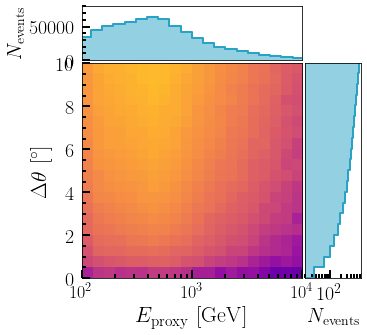

In [7]:
bg = load_bg()
dist = bg

fig = plt.figure(figsize=(5,5))
gs = GridSpec(2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
ax1, ax2, ax3 = fig.add_subplot(gs[2]), fig.add_subplot(gs[0]), fig.add_subplot(gs[3])
im = ax1.imshow(np.log10(dist)[::-1], 
              aspect='auto',
              extent=[0,6,0,180,],
#               vmax=5,
             )

xtick_pos = [0,1,2,3,4,5]
ax1.set_xticklabels([r'$10^{%d}$' % x for x in xtick_pos])
ax1.set_xticks(xtick_pos)
ax1.set_xlabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_ylabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
sort_out_log_axes(ax1, im, logy=False)
ax1.set_ylim(0, 10)
ax1.set_xlim(2, 4)

ax2.step(np.linspace(0,6,60), np.sum(dist, axis=0), where='mid')
ax2.fill_between(np.linspace(0,6,60), np.sum(dist, axis=0), alpha=0.5, step='mid')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(0, 80000)
ax3.set_yticks([50000])
ax2.set_xticks([])
ax2.set_ylabel(r'$N_{\rm{events}}$')

ax3.step(np.sum(dist, axis=1), np.linspace(0,180,359), where='mid')
ax3.fill_between(np.sum(dist, axis=1), np.linspace(0,180,359), alpha=0.5, step='mid')
ax3.set_ylim(ax1.get_ylim())
ax3.semilogx()
ax3.set_yticks([])
ax3.set_xlim(20, 750)
ax3.set_xlabel(r'$N_{\rm{events}}$')

plt.savefig('/data/user/jlazar/solar/plots/event_distributions/data_scrambled_oversample.pdf', dpi=400, bbox_inches='tight')
plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


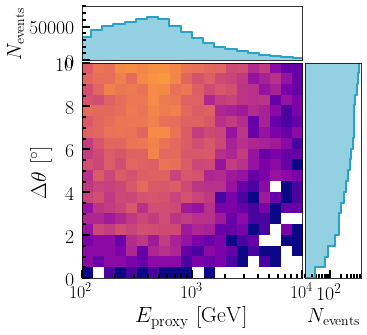

In [9]:
try:
    dist = data
except:
    data = load_data()
    dist = data
    
fig = plt.figure(figsize=(5,5))
gs = GridSpec(2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
ax1, ax2, ax3 = fig.add_subplot(gs[2]), fig.add_subplot(gs[0]), fig.add_subplot(gs[3])
im = ax1.imshow(np.log10(dist)[::-1], 
              aspect='auto',
              extent=[0,6,0,180,],
#               vmax=5,
             )

xtick_pos = [0,1,2,3,4,5]
ax1.set_xticklabels([r'$10^{%d}$' % x for x in xtick_pos])
ax1.set_xticks(xtick_pos)
ax1.set_xlabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_ylabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
sort_out_log_axes(ax1, im, logy=False)
ax1.set_ylim(0, 10)
ax1.set_xlim(2, 4)

ax2.step(np.linspace(0,6,60), np.sum(dist, axis=0), where='mid')
ax2.fill_between(np.linspace(0,6,60), np.sum(dist, axis=0), alpha=0.5, step='mid')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(0, 80000)
ax3.set_yticks([50000])
ax2.set_xticks([])
ax2.set_ylabel(r'$N_{\rm{events}}$')

ax3.step(np.sum(dist, axis=1), np.linspace(0,180,359), where='mid')
ax3.fill_between(np.sum(dist, axis=1), np.linspace(0,180,359), alpha=0.5, step='mid')
ax3.set_ylim(ax1.get_ylim())
ax3.semilogx()
ax3.set_yticks([])
ax3.set_xlim(20, 750)
ax3.set_xlabel(r'$N_{\rm{events}}$')

plt.savefig('/data/user/jlazar/solar/plots/event_distributions/data.pdf', dpi=400, bbox_inches='tight')
plt.show()


# yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
# dist = None
# for yr in yrr:
#     fs = glob('/data/user/jlazar/solar/data//distributions/IC86_%d_exp_*.npy' % yr)
#     for f in fs:
#         if dist is None:
#             dist = np.divide(np.load(f), len(fs))
#         else:
#             dist += np.divide(np.load(f), len(fs))
# print(np.sum(dist))

# print('Before resampling')
# fig = plt.figure(figsize=(5,5))
# gs = GridSpec(2, 2, height_ratios=[1,4], width_ratios=[4,1])
# gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
# ax1, ax2, ax3 = fig.add_subplot(gs[2]), fig.add_subplot(gs[0]), fig.add_subplot(gs[3])
# im = ax1.imshow(np.log10(dist)[::-1], 
#               aspect='auto',
#               extent=[0,6,0,180,],
# #               vmax=5,
#              )

# xtick_pos = [0,1,2,3,4,5]
# ax1.set_xticklabels([r'$10^{%d}$' % x for x in xtick_pos])
# ax1.set_xticks(xtick_pos)
# ax1.set_xlabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
# ax1.set_ylabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
# sort_out_log_axes(ax1, im, logy=False)
# ax1.set_ylim(0, 10)
# ax1.set_xlim(2, 4)

# ax2.step(np.linspace(0,6,60), np.sum(dist, axis=0), where='mid')
# ax2.fill_between(np.linspace(0,6,60), np.sum(dist, axis=0), alpha=0.5, step='mid')
# ax2.set_xlim(ax1.get_xlim())
# ax2.set_ylim(0, 80000)
# ax3.set_yticks([50000])
# ax2.set_xticks([])
# ax2.set_ylabel(r'$N_{\rm{events}}$')

# ax3.step(np.sum(dist, axis=1), np.linspace(0,180,359), where='mid')
# ax3.fill_between(np.sum(dist, axis=1), np.linspace(0,180,359), alpha=0.5, step='mid')
# ax3.set_ylim(ax1.get_ylim())
# ax3.semilogx()
# ax3.set_yticks([])
# ax3.set_xlim(20, 750)
# ax3.set_xlabel(r'$N_{\rm{events}}$')

# # plt.savefig('/data/user/jlazar/solar/plots/event_distributions/data_scrambled.pdf', dpi=400, bbox_inches='tight')
# plt.show()

In [20]:
print(np.sum(bg[-2:]))
print(np.sum(data[-2:]))

15.840000000000007
14.0


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


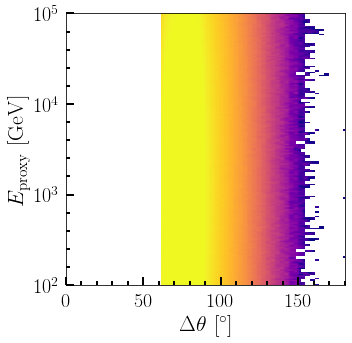

665291.0
Before resampling


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator


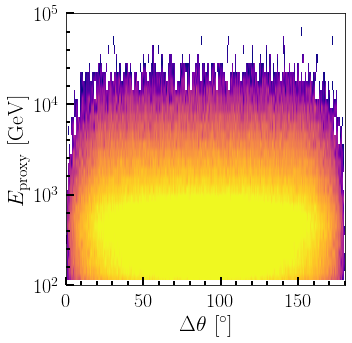

In [6]:
yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
dist = None
for yr in yrr:
    fs = glob('/data/user/jlazar/solar/data//distributions/oversample/IC86_%d_exp_*.npy' % yr)

    for f in fs:
        if dist is None:
            dist = np.divide(np.load(f), len(fs))
        else:
            dist += np.divide(np.load(f), len(fs))

fig = plt.figure(figsize=(5,5))
gs = GridSpec (1, 1)
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
ax1 = fig.add_subplot(gs[0])
im = ax1.imshow(np.log(dist), 
              aspect='auto',
              extent=[0,180,0,6],
              vmax=5,
             )

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0, 180)
ax1.set_ylim(2, 5)


# plt.savefig('/data/user/jlazar/solar/plots/event_distributions/data_scrambled_oversample.pdf', dpi=400, bbox_inches='tight')
plt.show()


yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
dist = None
for yr in yrr:
#     fs = glob('/data/user/jlazar/solar/data//distributions/oversample/IC86_%d_exp_*.npy' % yr)
    fs = glob('/data/user/jlazar/solar/data//distributions/IC86_%d_exp_*.npy' % yr)
    for f in fs:
        if dist is None:
            dist = np.divide(np.load(f), len(fs))
        else:
            dist += np.divide(np.load(f), len(fs))
print(np.sum(dist))

print('Before resampling')
fig = plt.figure(figsize=(5,5))
gs = GridSpec (1,1)
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
ax1 = fig.add_subplot(gs[0])
im = ax1.imshow(np.log(dist.T[::-1]), 
              aspect='auto',
              extent=[0,180,0,6],
              vmax=5,
             )

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0, 180)
ax1.set_ylim(2, 5)

# plt.savefig('/data/user/jlazar/solar/plots/event_distributions/data_scrambled.pdf', dpi=400, bbox_inches='tight')
plt.show()

665290.9999999998
data


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


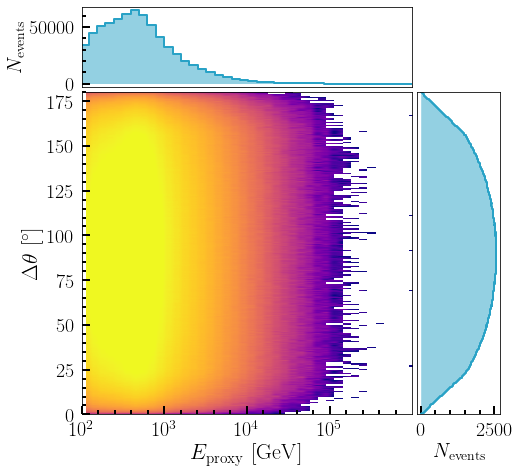

In [61]:
yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
dist = None
for yr in yrr:
    fs = glob('/data/user/jlazar/solar/data//distributions/oversample/IC86_%d_exp_*.npy' % yr)

    for f in fs:
        if dist is None:
            dist = np.divide(np.load(f), len(fs))
        else:
            dist += np.divide(np.load(f), len(fs))
print(np.sum(dist))
    # dist = np.divide(dist, livetime*np.load('%s/distributions/conv-atm_IC86_pass2_MC_00.npy' % datadir))

print('data')
fig = plt.figure(figsize=(7.5,7.5))
gs = GridSpec (2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log(dist[::-1]), 
              aspect='auto',
              extent=[0, 6, 0, 180,],
              vmax=5,
             )

xtick_pos = [0,1,2,3,4,5]
ax1.set_xticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_xticks(xtick_pos)
ax1.set_xlabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_ylabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_ylim(0, 180)
ax1.set_xlim(2, 6)

ax3.step(np.linspace(0,6,60), np.sum(dist, axis=0), where='mid')
ax3.fill_between(np.linspace(0,6,60), np.sum(dist, axis=0), alpha=0.5, step='mid')
# ax3.set_yticklabels([])
ax3.set_xticks([])
ax3.set_ylabel(r'$N_{\rm{events}}$')
ax3.set_xlim(ax1.get_xlim())

ax2.step(np.sum(dist, axis=1), np.linspace(0,180,359), where='mid')
ax2.fill_between(np.sum(dist, axis=1), np.linspace(0,180,359), alpha=0.5, step='mid')
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel(r'$N_{\rm{events}}$')


plt.savefig('/data/user/jlazar/solar/plots/event_distributions/data_scrambled_oversample_1D_proj.pdf', dpi=400, bbox_inches='tight')
plt.show()


# yrr = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
# dist = None
# for yr in yrr:
# #     fs = glob('/data/user/jlazar/solar/data//distributions/oversample/IC86_%d_exp_*.npy' % yr)
#     fs = glob('/data/user/jlazar/solar/data//distributions/IC86_%d_exp_*.npy' % yr)
#     for f in fs:
#         if dist is None:
#             dist = np.divide(np.load(f), len(fs))
#         else:
#             dist += np.divide(np.load(f), len(fs))
# print(np.sum(dist))

# print('Before resampling')
# fig = plt.figure(figsize=(7.5,7.5))
# gs = GridSpec (2, 2, height_ratios=[1,4], width_ratios=[4,1])
# gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
# (ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
# im = ax1.imshow(np.log(dist.T[::-1]), 
#               aspect='auto',
#               extent=[0,180,0,6],
#               vmax=5,
#              )

# ytick_pos = [0,1,2,3,4,5]
# ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax1.set_yticks(ytick_pos)
# ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
# ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
# ax1.set_xlim(0, 5)
# ax1.set_ylim(2, 5)

# ax2.step(np.sum(dist, axis=0), np.linspace(0,6,60), where='post')
# ax2.fill_between(np.sum(dist, axis=0), np.linspace(0,6,60), alpha=0.5, step='post')
# ax2.set_yticklabels([])
# ax2.set_xlabel(r'$N_{\rm{events}}$')
# ax2.set_ylim(2, 5)
# ax2.set_xlim(0, None)

# ax3.step(np.linspace(0,180,359), np.sum(dist, axis=1), where='mid')
# ax3.fill_between(np.linspace(0,180,359), np.sum(dist, axis=1), alpha=0.5, step='mid')
# ax3.set_xticklabels([])
# ax3.set_xlim(0, 5)
# ax3.set_ylim(0, 500)
# ax3.set_ylabel(r'$N_{\rm{events}}$')

# # plt.savefig('/data/user/jlazar/solar/plots/event_distributions/data_scrambled_1D_proj.pdf', dpi=400, bbox_inches='tight')
# plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


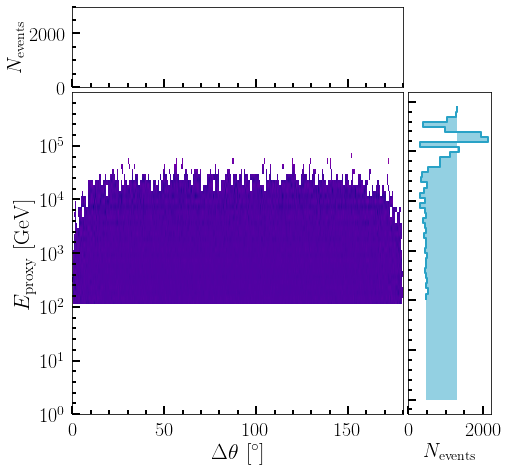

In [10]:
fs = glob('/data/user/jlazar/solar/data//distributions//IC86_????_exp_00.npy')
dist = None
for f in fs:
    if dist is None:
        dist = np.load(f)
    else:
        dist += np.load(f)
# dist = livetime*np.load('%s/distributions/conv-atm_IC86_pass2_MC_00.npy' % datadir)+livetime*np.sum(np.load('%s/distributions/conv-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir),axis=2)

fig = plt.figure(figsize=(7.5,7.5))
gs = GridSpec (2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log10(dist.T[::-1]), 
              aspect='auto',
              extent=[0,180,0,6]
             )

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0, 180)
ax1.set_ylim(0, 6)


# cbar = plt.colorbar(im, ax=ax1)
ax2.step(np.sum(dist, axis=0), np.linspace(0,6,60),)
ax2.fill_between(np.sum(dist, axis=0), np.linspace(0,6,60), alpha=0.5, step='pre')
ax2.set_yticklabels([])
# ax2.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax2.set_yticks(ytick_pos)
ax2.set_xlabel(r'$N_{\rm{events}}$')
ax2.set_xlim(0, None)

ax3.step(np.linspace(0,180,359), np.sum(dist, axis=1), )
ax3.fill_between(np.linspace(0,180,359), np.sum(dist, axis=1), alpha=0.5, step='pre')
ax3.set_xticklabels([])
ax3.set_xlim(0, 180)
ax3.set_ylim(0, 3000)
# ax3.set_yticks([0.5, 1])
ax3.set_ylabel(r'$N_{\rm{events}}$')
# ax3.set_semi

# plt.savefig('/data/user/jlazar/solar/plots/event_distributions/conv-atm_combined')
plt.show()

0.0
2.9309150295203352


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jlazar/.local/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/jlazar/.local/lib/python3.7/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


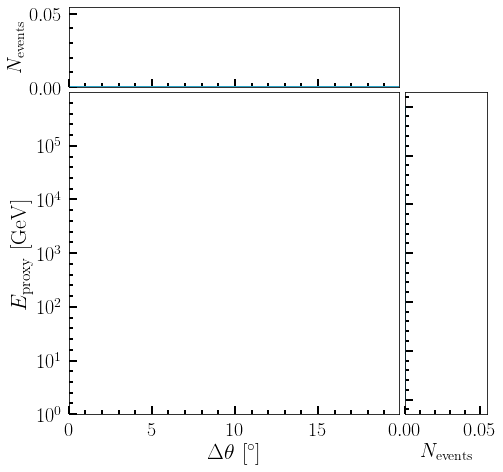

In [12]:
dist = livetime*np.load('/data/user/jlazar/solar/data//distributions//ch5-m300_1AU_BRW_IC86_pass2_MC_00_IC79_IC86_MC_21047_dom_105_compressed_00.npy')
# dist = livetime*np.load('%s/distributions/solar-atm_IC86_pass2_MC_00.npy' % datadir) \
#        + livetime*np.sum(np.load('%s/distributions/solar-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir),axis=2)
print(np.sum(dist))
print(np.sum(livetime*np.sum(np.load('%s/distributions/solar-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir),axis=2)))

fig = plt.figure(figsize=(7.5,7.5))
gs = GridSpec (2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log10(dist.T[::-1]), 
              aspect='auto',
              extent=[0,180,0,6]
             )

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0, 19.9)
ax1.set_ylim(0, 6)


# cbar = plt.colorbar(im, ax=ax1)
ax2.step(np.sum(dist, axis=0), np.linspace(0,6,60), where='post')
ax2.fill_between(np.sum(dist, axis=0), np.linspace(0,6,60), alpha=0.5, step='post')
ax2.set_yticklabels([])
# ax2.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax2.set_yticks(ytick_pos)
ax2.set_xlabel(r'$N_{\rm{events}}$')
ax2.set_xlim(0, None)

ax3.step(np.linspace(0,180,359), np.sum(dist, axis=1), where='post')
ax3.fill_between(np.linspace(0,180,359), np.sum(dist, axis=1), alpha=0.5, step='post')
ax3.set_xticklabels([])
# ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=15)
ax3.set_xlim(0, 19.9)
ax3.set_ylim(0, None)
# ax3.set_yticks([0.5, 1])
ax3.set_ylabel(r'$N_{\rm{events}}$')
# ax3.set_semi

plt.savefig('/data/user/jlazar/solar/plots/event_distributions/solar-atm_combined')
plt.show()

508317.10807850934
3.5902109901598367


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


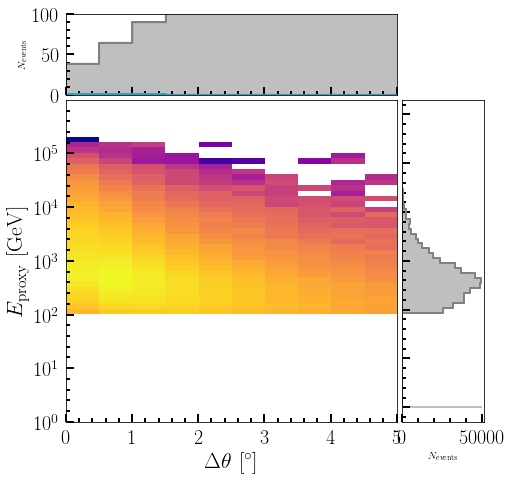

In [20]:
bg  = livetime*np.load('%s/distributions/conv-atm_IC86_pass2_MC_00.npy' % datadir)
sig = livetime*np.load('%s/distributions/solar-atm_IC86_pass2_MC_00.npy' % datadir)

fig = plt.figure(figsize=(7.5,7.5))
gs = GridSpec (2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log10(sig.T[::-1]), 
              aspect='auto',
              extent=[0,180,0,6]
             )
# im2 = ax1.imshow(np.log10(bg.T[::-1]), 
#               aspect='auto',
#               extent=[0,180,0,6],
#               cmap='gray'
#              )

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 6)

ax2.step(np.sum(sig, axis=0), np.linspace(0,6,60), where='post')
ax2.fill_between(np.sum(sig, axis=0), np.linspace(0,6,60), alpha=0.5, step='post')
ax2.step(np.sum(bg, axis=0), np.linspace(0,6,60), color='gray', where='post')
ax2.fill_between(np.sum(bg, axis=0), np.linspace(0,6,60), alpha=0.5, step='post', color='gray')
ax2.set_yticklabels([])
# ax2.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax2.set_yticks(ytick_pos)
ax2.set_xlabel(r'$N_{\rm{events}}$')
ax2.set_xlim(0, None)

ax3.step(np.linspace(0,180,359), np.sum(sig, axis=1))
ax3.fill_between(np.linspace(0,180,359), np.sum(sig, axis=1), alpha=0.5, step='pre')
ax3.step(np.linspace(0,180,359), np.sum(bg, axis=1), color='gray')
ax3.fill_between(np.linspace(0,180,359), np.sum(bg, axis=1), alpha=0.5, step='pre', color='gray')
ax3.set_xticklabels([])
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 100)
# ax3.set_
# ax3.set_yticks([0.5, 1])
ax3.set_ylabel(r'$N_{\rm{events}}$')
# ax3.set_semi

# plt.savefig('/data/user/jlazar/solar/plots/event_distributions/conv-atm_combined')
plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


0.1103567055530234
3.5902109901598367


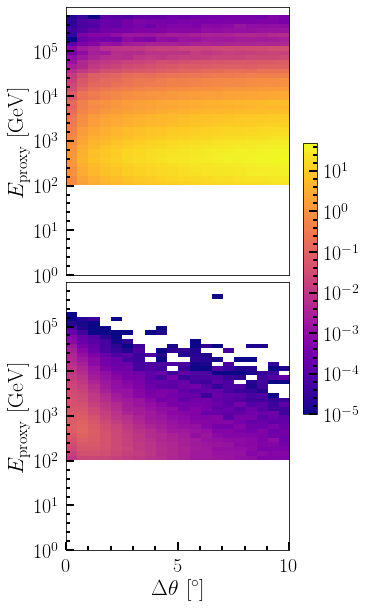

In [37]:
bg  = livetime*np.load('%s/distributions/conv-atm_IC86_pass2_MC_00.npy' % datadir)
sig = livetime*np.load('%s/distributions/solar-atm_IC86_pass2_MC_00.npy' % datadir)
lsig = np.log10(sig)
print(np.max(sig))
print(np.sum(sig))

fig = plt.figure(figsize=(5, 10))
gs = GridSpec (2, 1)
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2) = (fig.add_subplot(gs[0]), fig.add_subplot(gs[1]))
im = ax1.imshow(np.log10(bg.T[::-1]), 
              aspect='auto',
              extent=[0,180,0,6],
              vmin=np.log10(0.00001),
              vmax=np.log10(50)
             )
im2 = ax2.imshow(lsig.T[::-1], 
              aspect='auto',
              extent=[0,180,0,6],
              vmin=np.log10(0.00001),
              vmax=np.log10(50)
             )

cbar = fig.colorbar(im, ax=[ax1, ax2], shrink=0.5)
# cbar.set_label(label=r'$\sigma_{p\nu}$', fontsize=18)
cbar_min = int(np.ceil(np.min(lsig[np.isfinite(lsig)])))
cbar_max = int(np.floor(np.log10(np.max(50))))
cbar_tick_pos = np.linspace(cbar_min, cbar_max, cbar_max-cbar_min+1)
cbar_tick_lab = [r'$10^{%d}$' % e for e in cbar_tick_pos]
cbar.set_ticks(cbar_tick_pos)
cbar.set_ticklabels(cbar_tick_lab)

dtheta_min = 0
dtheta_max = 10

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
# ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xticks([])
ax1.set_xlim(dtheta_min, dtheta_max)
ax1.set_ylim(0, 6)

ytick_pos = [0,1,2,3,4,5]
ax2.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax2.set_yticks(ytick_pos)
ax2.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax2.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax2.set_xlim(dtheta_min, dtheta_max)
ax2.set_ylim(0, 6)

plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


0.00298422699518335
2.9309150295203352


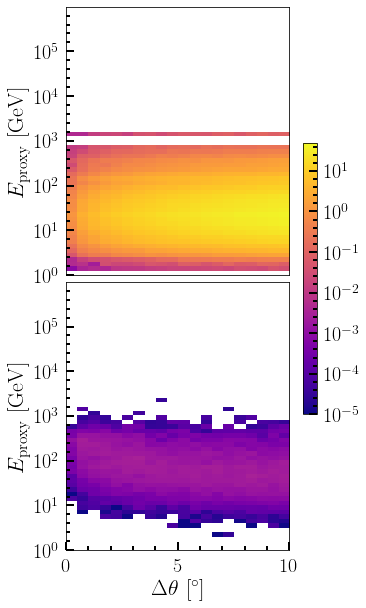

In [36]:
bg  = livetime*np.sum(np.load('%s/distributions/conv-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir), axis=2)
sig = livetime*np.sum(np.load('%s/distributions/solar-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir), axis=2)
lsig = np.log10(sig)
print(np.max(sig))
print(np.sum(sig))

fig = plt.figure(figsize=(5, 10))
gs = GridSpec (2, 1)
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2) = (fig.add_subplot(gs[0]), fig.add_subplot(gs[1]))
im = ax1.imshow(np.log10(bg.T[::-1]), 
              aspect='auto',
              extent=[0,180,0,6],
              vmin=np.log10(0.00001),
              vmax=np.log10(50)
             )
im2 = ax2.imshow(lsig.T[::-1], 
              aspect='auto',
              extent=[0,180,0,6],
              vmin=np.log10(0.00001),
              vmax=np.log10(50)
             )

cbar = fig.colorbar(im, ax=[ax1, ax2], shrink=0.5)
# cbar.set_label(label=r'$\sigma_{p\nu}$', fontsize=18)
cbar_min = int(np.ceil(np.min(lsig[np.isfinite(lsig)])))
cbar_max = int(np.floor(np.log10(np.max(50))))
cbar_tick_pos = np.linspace(cbar_min, cbar_max, cbar_max-cbar_min+1)
cbar_tick_lab = [r'$10^{%d}$' % e for e in cbar_tick_pos]
cbar.set_ticks(cbar_tick_pos)
cbar.set_ticklabels(cbar_tick_lab)

dtheta_min = 0
dtheta_max = 10

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
# ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xticks([])
ax1.set_xlim(dtheta_min, dtheta_max)
ax1.set_ylim(0, 6)

ytick_pos = [0,1,2,3,4,5]
ax2.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax2.set_yticks(ytick_pos)
ax2.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax2.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax2.set_xlim(dtheta_min, dtheta_max)
ax2.set_ylim(0, 6)

plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


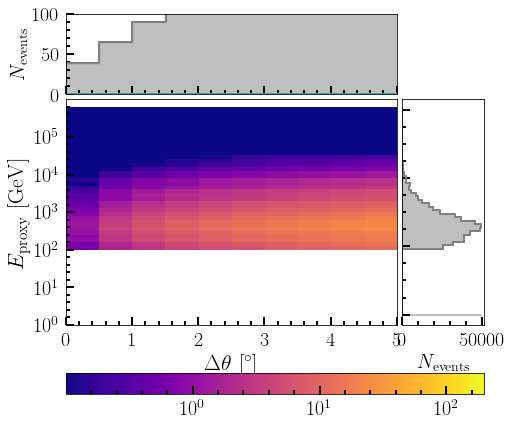

In [7]:
bg  = livetime*np.load('%s/distributions/conv-atm_IC86_pass2_MC_00.npy' % datadir)
sig = livetime*np.load('%s/distributions/solar-atm_IC86_pass2_MC_00.npy' % datadir)

fig = plt.figure(figsize=(7.5,7.5))
gs = GridSpec (2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
# im = ax1.imshow(np.log10(sig.T[::-1]), 
#               aspect='auto',
#               extent=[0,180,0,6]
#              )
im = ax1.imshow(np.log10(bg.T[::-1]), 
              aspect='auto',
              extent=[0,180,0,6],
#               cmap='gray',
              vmin=np.log10(0.1),
              vmax=np.log10(200)
             )

cbar = fig.colorbar(im, location="bottom", ax=[ax1, ax2])
# cbar.set_label(label=r'$\sigma_{p\nu}$', fontsize=18)
cbar_min = int(np.ceil(np.min(bg[np.isfinite(bg)])))
cbar_max = int(np.floor(np.max(bg)))
cbar_tick_pos = np.linspace(cbar_min, cbar_max, cbar_max-cbar_min+1)
cbar_tick_lab = [r'$10^{%d}$' % e for e in cbar_tick_pos]
cbar.set_ticks(cbar_tick_pos)
cbar.set_ticklabels(cbar_tick_lab)

dtheta_min = 0
dtheta_max = 5

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(dtheta_min, dtheta_max)
ax1.set_ylim(0, 6)

ax2.step(np.sum(sig, axis=0), np.linspace(0,6,60), where='post')
ax2.fill_between(np.sum(sig, axis=0), np.linspace(0,6,60), alpha=0.5, step='post')
ax2.step(np.sum(bg, axis=0), np.linspace(0,6,60), color='gray', where='post')
ax2.fill_between(np.sum(bg, axis=0), np.linspace(0,6,60), alpha=0.5, step='post', color='gray')
ax2.set_yticklabels([])
# ax2.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax2.set_yticks(ytick_pos)
ax2.set_xlabel(r'$N_{\rm{events}}$')
ax2.set_xlim(0, None)

ax3.step(np.linspace(0,180,359), np.sum(sig, axis=1))
ax3.fill_between(np.linspace(0,180,359), np.sum(sig, axis=1), alpha=0.5, step='pre')
ax3.step(np.linspace(0,180,359), np.sum(bg, axis=1), color='gray')
ax3.fill_between(np.linspace(0,180,359), np.sum(bg, axis=1), alpha=0.5, step='pre', color='gray')
ax3.set_xticklabels([])
ax3.set_xlim(dtheta_min, dtheta_max)
ax3.set_ylim(0, 100)
# ax3.set_
# ax3.set_yticks([0.5, 1])
ax3.set_ylabel(r'$N_{\rm{events}}$')

# plt.savefig('/data/user/jlazar/solar/plots/event_distributions/conv-atm_combined')
plt.show()

3.5902109901598367
2.9309150295203352


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


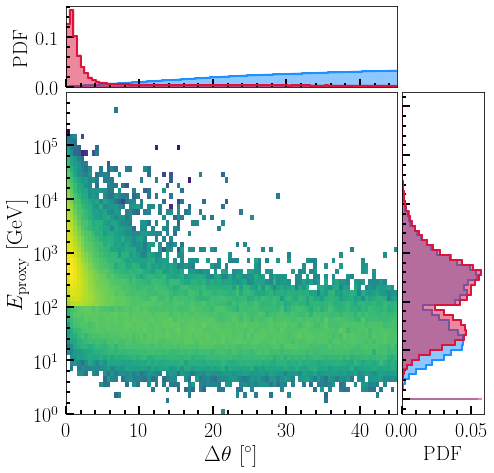

In [21]:
dist = livetime*np.load('%s/distributions/solar-atm_IC86_pass2_MC_00.npy' % datadir) \
       + livetime*np.sum(np.load('%s/distributions/solar-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir),axis=2)
print(np.sum(livetime*np.load('%s/distributions/solar-atm_IC86_pass2_MC_00.npy' % datadir)))
print(np.sum(livetime*np.sum(np.load('%s/distributions/solar-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir),axis=2)))

fig = plt.figure(figsize=(7.5,7.5))
gs = GridSpec (2, 2, height_ratios=[1,4], width_ratios=[4,1])
gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log10(dist.T[::-1]), 
                aspect='auto',
                extent=[0,180,0,6],
                cmap='viridis'
             )

c  = 'crimson'
c2 = 'dodgerblue'

ytick_pos = [0,1,2,3,4,5]
ax1.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax1.set_yticks(ytick_pos)
ax1.set_ylabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_xlabel(r'$\Delta\theta\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0, 45)
ax1.set_ylim(0, 6)


ax2.step(np.sum(dist, axis=0)/np.sum(dist), np.linspace(0,6,60), where='post', color=c)
ax2.fill_between(np.sum(dist, axis=0)/np.sum(dist), np.linspace(0,6,60), alpha=0.5, step='post', color=c)
ax2.set_yticklabels([])
# ax2.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax2.set_yticks(ytick_pos)
ax2.set_xlabel(r'PDF')
ax2.set_xlim(0, None)

ax3.step(np.linspace(0,180,359), np.sum(dist, axis=1)/np.sum(dist), where='post', color=c)
ax3.fill_between(np.linspace(0,180,359), np.sum(dist, axis=1)/np.sum(dist), alpha=0.5, step='post', color=c)
ax3.set_xticklabels([])
ax3.set_xlim(0, 45)
ax3.set_ylim(0, None)
# ax3.set_yticks([0.5, 1])
ax3.set_ylabel(r'PDF')

#### LOAD UP BG FOR PLOTTING ####
dist = livetime*np.load('%s/distributions/conv-atm_IC86_pass2_MC_00.npy' % datadir)+livetime*np.sum(np.load('%s/distributions/conv-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir),axis=2)
ax2.step(np.sum(dist, axis=0)/np.sum(dist), np.linspace(0,6,60), where='post', color=c2, zorder=0)
ax2.fill_between(np.sum(dist, axis=0)/np.sum(dist), np.linspace(0,6,60), alpha=0.5, step='post', color=c2, zorder=0)
ax3.step(np.linspace(0,180,359), 10*np.sum(dist, axis=1)/np.sum(dist), where='post', color=c2, zorder=0)
ax3.fill_between(np.linspace(0,180,359), 10*np.sum(dist, axis=1)/np.sum(dist), alpha=0.5, step='post', color=c2, zorder=0)


# plt.savefig('/data/user/jlazar/solar/plots/event_distributions/solar-atm_combined')
plt.show()

In [2]:
import h5py as h5
from glob import glob
import pandas

In [3]:
infiles = sorted(glob('/data/user/jlazar/big_files/solar_atmospherics/merging/*'))

In [12]:
n = 0
for f in infiles:
    h5f = h5.File(f, 'r')
    n += h5f['QTot'].shape[0]
print(n)

364966010


In [4]:
descs = []
h5f = h5.File(infiles[0], 'r')
for key in h5f.keys():
    descs.append((key, h5f[key].dtype))
h5f.close()
print(descs)

[('BayesRatio', dtype('<f8')), ('COGZ', dtype('<f8')), ('COGZSigma', dtype('<f8')), ('LDir_A', dtype('<f8')), ('LDir_B', dtype('<f8')), ('LDir_C', dtype('<f8')), ('LDir_E', dtype('<f8')), ('NDirDOM_A', dtype('<f8')), ('NDirDOM_B', dtype('<f8')), ('NDirDOM_C', dtype('<f8')), ('NDirDOM_E', dtype('<f8')), ('NDirPulse_A', dtype('<f8')), ('NDirPulse_B', dtype('<f8')), ('NDirPulse_C', dtype('<f8')), ('NDirPulse_E', dtype('<f8')), ('NDirStr_A', dtype('<f8')), ('NDirStr_B', dtype('<f8')), ('NDirStr_C', dtype('<f8')), ('NDirStr_E', dtype('<f8')), ('PrimaryType', dtype('<f8')), ('QTot', dtype('<f8')), ('RLogL', dtype('<f8')), ('RecoAngSep', dtype('<f8')), ('RecoAzimuth', dtype('<f8')), ('RecoZenith', dtype('<f8')), ('TrueAzimuth', dtype('<f8')), ('TrueEnergy', dtype('<f8')), ('TrueZenith', dtype('<f8')), ('ZTravel', dtype('<f8')), ('eff_oneweight', dtype('<f8')), ('oneweight', dtype('<f8'))]


In [5]:
outfile = '/data/user/jlazar/big_files/solar_atmospherics/l3_b_corsika_merged_holeice-0300_1.h5'
print(outfile)
with h5.File(outfile, 'w') as h5_outfile:
        dsets = {}
        for key, dtype in descs:
            dsets[key] = h5_outfile.create_dataset(key, (0,), dtype=dtype, maxshape=(None,), chunks=None)
        for k, infile in enumerate(infiles):
#             with h5.File('/data/user/jlazar/big_files/solar_atmospherics/merging/l3_b_corsika_merged_holeice-0300_0.h5', 'r') as h5_infile:
            with h5.File(infile, 'r') as h5_infile:
                if len(h5_infile.keys())>1:
                    for key, _ in descs:
                        dset = dsets[key]
                            
                        n = h5_infile[key].shape[0]
                        if n > 0:
                            dset.resize((dset.shape[0]+n,))
                            g = h5_infile[key]
                            dset[-n:] = g.value

/data/user/jlazar/big_files/solar_atmospherics/l3_b_corsika_merged_holeice-0300_1.h5
bong


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


RuntimeError: H5c_protect() failed (wrong B-tree signature)

In [10]:
from solar_common.sensitivity import test_statistic, rebin_bdt
import numpy as np
livetime = 9*10**7.5

In [20]:
he_bg  = livetime*np.load('%s/distributions/conv-atm_IC86_pass2_MC_00.npy' % datadir)
he_sig = livetime*np.load('%s/distributions/solar-atm_IC86_pass2_MC_00.npy' % datadir)
le_bg  = livetime*rebin_bdt(np.load('%s/distributions/conv-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir), 1)
le_sig = livetime*rebin_bdt(np.load('%s/distributions/solar-atm_oscNext_pisa_genie_0000_vJeff_00.npy' % datadir), 1)

In [21]:
func = lambda x: test_statistic(np.array([x]), np.array([he_sig]), he_bg)-test_statistic(np.array([0]), np.array([he_sig]), he_bg)+test_statistic(np.array([x]), np.array([le_sig]), le_bg)-test_statistic(np.array([0]), np.array([le_sig]), le_bg)-2.71

In [22]:
from scipy.optimize import ridder

In [85]:
np.log10(np.sum(np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_IC86_pass2_MC_00.npy'))/np.sum(np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_oscNext_pisa_genie_0000_vJeff_00.npy'))/2)

-5.260288347033507

In [88]:
np.log10(6.8e-5/4/np.pi)

-5.26670095131586

In [6]:
def sort_out_log_axes(ax, im, xminor_ticks=[1,2,3,4,5,6,7,8,9], yminor_ticks=[1,2,3,4,5,6,7,8,9], logx=True, logy=True):

    ext = im.get_extent()
    if logy:
        # Sort out ticks and tick labels for y-axis
        tick_pos = np.linspace(np.ceil(ext[2]), np.floor(ext[3]), int(np.floor(ext[3])-np.ceil(ext[2]))+1, dtype=int)
        tick_lab = [r'$10^{%d}$' % e for e in tick_pos]
        ax.set_yticks(tick_pos)
        ax.set_yticklabels(tick_lab, fontsize=18)
        test_min_ticks = np.hstack(np.array(yminor_ticks)*x for x in np.logspace(np.floor(ext[2]), np.ceil(ext[3]), int(np.ceil(ext[3])-np.floor(ext[2]))+1))
        mask = np.where(np.logical_and(test_min_ticks>np.power(10.0, ext[2]), test_min_ticks<np.power(10.0, ext[3])))
        ax.set_yticks(np.log10(test_min_ticks[mask[0]]), minor=True)
    
    if logx:
        # Sort out ticks and tick labels for x-axis
        tick_pos = np.linspace(np.ceil(ext[0]), np.floor(ext[1]), int(np.floor(ext[1])-np.ceil(ext[0]))+1, dtype=int)
        tick_lab = [r'$10^{%d}$' % e for e in tick_pos]
        ax.set_xticks(tick_pos)
        ax.set_xticklabels(tick_lab, fontsize=18)
        test_min_ticks = np.hstack(np.array(xminor_ticks)*x for x in np.logspace(np.floor(ext[0]), np.ceil(ext[1]), int(np.ceil(ext[1])-np.floor(ext[0]))+1))
        mask = np.where(np.logical_and(test_min_ticks>np.power(10.0, ext[0]), test_min_ticks<np.power(10.0, ext[1])))
        ax.set_xticks(np.log10(test_min_ticks[mask[0]]), minor=True)


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


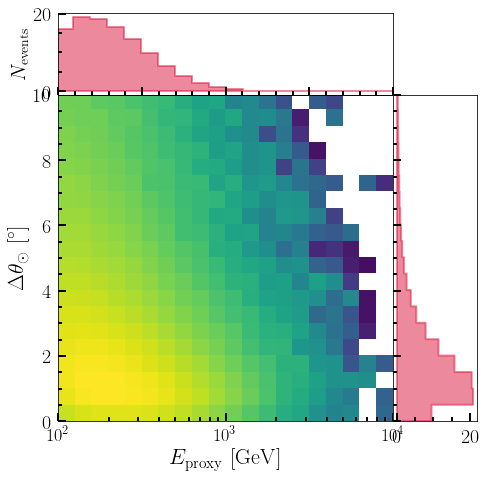

In [10]:
livetime = 3186.1*24*3600
sig = livetime*np.load('/data/user/jlazar/solar/data/distributions/ch5-m1000_1AU_BRW_IC86_pass2_MC_00.npy')

fig = plt.figure(figsize=(7.5, 7.5))
gs = GridSpec (2, 2, width_ratios=[4,1], height_ratios=[1,4])
gs.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log10(sig)[::-1], 
                aspect='auto',
                extent=[0,6,0,180],
                cmap='viridis'
               )
sort_out_log_axes(ax1, im, logy=False)

ax1.set_xlabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_ylabel(r'$\Delta\theta_{\odot}\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(2, 4)
ax1.set_ylim(0,10)

ax2.set_yticklabels([])
ax2.set_ylim(ax1.get_ylim())

ax2.fill_betweenx(np.linspace(0,180,359), 0, np.sum(sig, axis=1), alpha=0.5, step='post', color='crimson')

ax3.fill_between(np.linspace(0,6,60), 0, np.sum(sig, axis=0), alpha=0.5, step='mid', color='crimson')
ax3.set_xticklabels([])
ax3.set_ylabel(r'$N_{\rm{events}}$')
ax3.set_xlim(ax1.get_xlim())

plt.savefig('/data/user/jlazar/solar/plots/event_distributions/ch5-m1000_tot_events_HE.pdf')
plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


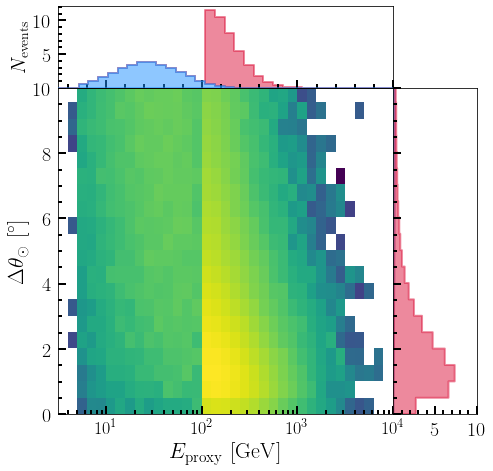

In [13]:
sig = livetime*np.load('/data/user/jlazar/solar/data/distributions/ch5-m500_1AU_BRW_IC86_pass2_MC_00.npy')
sig_le = 8/9*livetime*np.sum(np.load('/data/user/jlazar/solar/data/distributions/ch5-m500_1AU_BRW_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
# sig = livetime*np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_IC86_pass2_MC_00.npy')
# sig_le = 8/9*livetime*np.sum(np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
# sig_le = livetime*np.sum(np.load('/data/user/jlazar/solar/data/distributions/sibyll23c_conv_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
# sig = livetime*8/9*np.load('/data/user/jlazar/solar/data/distributions/conv-atm_IC86_pass2_MC_00.npy')

fig = plt.figure(figsize=(7.5, 7.5))
gs = GridSpec (2, 2, width_ratios=[4,1], height_ratios=[1,4])
gs.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log10(sig+sig_le)[::-1], 
                aspect='auto',
                extent=[0,6,0,180],
                cmap='viridis'
               )
sort_out_log_axes(ax1, im, logy=False)

# xtick_pos = [0,1,2,3,4,5]
# ax1.set_xticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax1.set_xticks(ytick_pos)
ax1.set_xlabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_ylabel(r'$\Delta\theta_{\odot}\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0.5, 4)
ax1.set_ylim(0,10)

ax2.set_yticklabels([])
ax2.set_ylim(ax1.get_ylim())
# ax2.semilogx()
ax2.set_xlim(0.001, 10)
ax2.fill_betweenx(np.linspace(0,180,359), 0, np.sum(sig_le, axis=1), alpha=0.5, step='post', color='dodgerblue')
ax2.fill_betweenx(np.linspace(0,180,359), np.sum(sig_le, axis=1), np.sum(sig_le, axis=1)+np.sum(sig, axis=1), alpha=0.5, step='post', color='crimson')


ax3.fill_between(np.linspace(0,6,60), np.sum(sig_le, axis=0), alpha=0.5, step='post', color='dodgerblue', zorder=10)
ax3.fill_between(np.linspace(0,6,60), np.sum(sig_le, axis=0), np.sum(sig_le, axis=0)+np.sum(sig, axis=0), alpha=0.5, step='post', color='crimson')
ax3.set_xticklabels([])
ax3.set_ylabel(r'$N_{\rm{events}}$')
ax3.set_ylim(0.001, None)
ax3.set_xlim(ax1.get_xlim())

plt.savefig('/data/user/jlazar/solar/plots/event_distributions/ch5-m500_tot_events_combined_vnow.pdf')
plt.show()

In [31]:
np.load('/data/user/jlazar/solar/data/distributions/ch5-m500_1AU_BRW_oscNext_pisa_genie_0000_vJeff_00.npy').shape

(359, 60, 100)

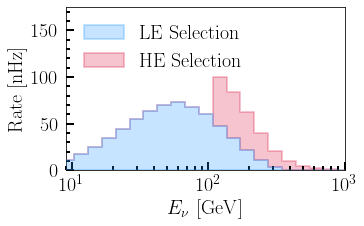

In [47]:
sig = 1e9*np.load('/data/user/jlazar/solar/data/distributions/ch5-m500_1AU_BRW_IC86_pass2_MC_00.npy')
sig_le = 1e9*np.sum(np.load('/data/user/jlazar/solar/data/distributions/ch5-m500_1AU_BRW_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
plt.fill_between(np.logspace(0,6,60), np.sum(sig_le, axis=0), alpha=0.25, step='post', color='dodgerblue', zorder=10, label='LE Selection')
plt.fill_between(np.logspace(0,6,60), np.sum(sig_le, axis=0), np.sum(sig_le, axis=0)+np.sum(sig, axis=0), alpha=0.25, step='post', color='crimson', label='HE Selection')
plt.xlim(9,1e3)
plt.ylabel('Rate [nHz]')
plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
# plt.title('True Energy')
plt.semilogx()
plt.legend(fontsize=20, loc=2, frameon=False)
plt.ylim(0, 175)
plt.savefig('/data/user/jlazar/solar/plots/ch5-m500_stacked_rate_v_true_e.pdf', bbox_inches='tight', dpi=400)
plt.show()

# sig = 1e9*np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_IC86_pass2_MC_00.npy')
# sig_le = 1e9*np.sum(np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
# plt.fill_between(np.logspace(0,6,60), np.sum(sig_le, axis=0), alpha=0.25, step='post', color='dodgerblue', zorder=10)
# plt.fill_between(np.logspace(0,6,60), np.sum(sig_le, axis=0), np.sum(sig_le, axis=0)+np.sum(sig, axis=0), alpha=0.25, step='post', color='crimson')
# plt.xlim(4,1e5)
# # plt.title('Reco. Energy')
# plt.ylabel('Rate [nHz]')
# plt.xlabel(r'$E_{\rm{proxy}}$')
# plt.semilogx()
# plt.ylim(0, None)
# plt.savefig('/data/user/jlazar/solar/plots/stacked_rate_v_reco_e.pdf', bbox_inches='tight')
# plt.show()

# print(np.sum(sig/1e9*9*10**7.5))
# print(np.sum(sig_le/1e9*8*10**7.5))

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


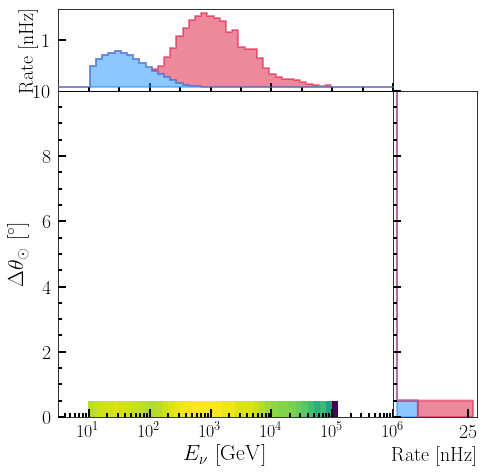

In [57]:
sig = 1e9*np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_IC86_pass2_MC_00_true_quants.npy')
# sig_le = livetime*np.sum(np.load('/data/user/jlazar/solar/data/distributions/sibyll23c_conv_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
# sig = livetime*8/9*np.load('/data/user/jlazar/solar/data/distributions/conv-atm_IC86_pass2_MC_00.npy')
sig_le = 1e9*np.sum(np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_oscNext_pisa_genie_0000_vJeff_00_true_quants.npy'), axis=2)

fig = plt.figure(figsize=(7.5, 7.5))
gs = GridSpec (2, 2, width_ratios=[4,1], height_ratios=[1,4])
gs.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(np.log10(sig+sig_le)[::-1], 
                aspect='auto',
                extent=[0,6,0,180],
                cmap='viridis'
               )
sort_out_log_axes(ax1, im, logy=False)

# xtick_pos = [0,1,2,3,4,5]
# ax1.set_xticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax1.set_xticks(ytick_pos)
ax1.set_xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_ylabel(r'$\Delta\theta_{\odot}\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0.5, 6)
ax1.set_ylim(0,10)

ax2.set_yticklabels([])
ax2.set_xticklabels([25])
ax2.set_xticks([25])
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel('Rate [nHz]')
# ax2.semilogx()
ax2.fill_betweenx(np.linspace(0,180,359), 0, np.sum(sig_le, axis=1), alpha=0.5, step='post', color='dodgerblue')
ax2.fill_betweenx(np.linspace(0,180,359), np.sum(sig_le, axis=1), np.sum(sig_le, axis=1)+np.sum(sig, axis=1), alpha=0.5, step='post', color='crimson')


ax3.fill_between(np.linspace(0,6,60), np.sum(sig_le, axis=0), alpha=0.5, step='post', color='dodgerblue', zorder=10)
ax3.fill_between(np.linspace(0,6,60), np.sum(sig_le, axis=0), np.sum(sig_le, axis=0)+np.sum(sig, axis=0), alpha=0.5, step='post', color='crimson')
ax3.set_xticklabels([])
ax3.set_yticks([1])
ax3.set_yticklabels([1])
ax3.set_ylabel('Rate [nHz]')
ax3.set_xlim(ax1.get_xlim())

plt.savefig('/data/user/jlazar/solar/plots/event_distributions/solar_atm_distribution_combined_true_quants.pdf')
plt.show()

In [38]:
from solar_common.mc_reader import MCReader
osc = MCReader('/data/user/jlazar/solar/solar_WIMP_v2/processing/oscNext/vJeff/oscNext_pisa_genie_0000_vJeff.hdf5')

KeyboardInterrupt: 

In [8]:
from solar_common.dist_maker import opening_angle
from solar_common.mc_reader import MCReader

In [9]:
osc = MCReader('/data/user/jlazar/solar/solar_WIMP_v2/processing/oscNext/vJeff/oscNext_pisa_genie_0000_vJeff.hdf5')

In [11]:
opening_angle.opening_angle?

In [12]:
op = opening_angle.opening_angle(osc['true_zen'], osc['true_az'], osc['true_zen'], osc['reco_az'], )

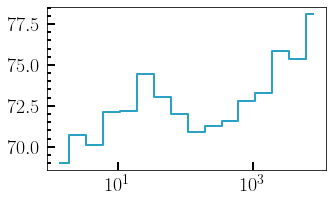

In [24]:
ee    = np.logspace(0,4, 17)
cents = (ee[:-1]+ee[1:])/2
rate = osc['oneweight']*np.load('/data/user/jlazar/solar/data/mc_dn_dz/sibyll23c_conv_oscNext_pisa_genie_0000_vJeff.npy')
h, _  = np.histogram(osc['true_e'], bins=ee, weights=op*rate)
h_, _ = np.histogram(osc['true_e'], bins=ee, weights=rate)

plt.step(cents, np.degrees(h/h_), where='mid')
plt.semilogx()
plt.show()

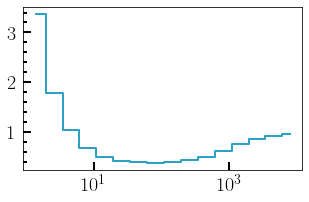

In [61]:
ee    = np.logspace(0,4, 17)
cents = (ee[:-1]+ee[1:])/2
h, _  = np.histogram(osc['true_e'], bins=ee, weights=np.abs(1-osc['reco_e']/osc['true_e']))
h_, _ = np.histogram(osc['true_e'], bins=ee)

plt.step(cents, h/h_, where='mid')
plt.semilogx()
plt.show()

In [22]:
import h5py as h5

In [23]:
h5f = h5.File('/data/user/jlazar/solar/solar_WIMP_v2/processing/oscNext/vJeff/oscNext_pisa_genie_0000_vJeff.hdf5', 'r')

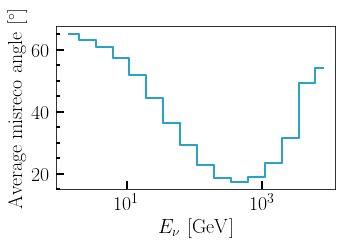

In [59]:
reco_zen = np.arccos(h5f['numu_cc']['L7_reconstructed_coszen'][()])
true_zen = np.arccos(h5f['numu_cc']['MCInIcePrimary.dir.coszen'][()])
reco_az  = h5f['numu_cc']['L7_reconstructed_azimuth'][()]
true_az  = h5f['numu_cc']['MCInIcePrimary.dir.azimuth'][()]
op       = opening_angle.opening_angle(true_zen, true_az, reco_zen, reco_az)
e        = h5f['numu_cc']['MCInIcePrimary.energy'][()]

h, _  = np.histogram(e, bins=ee, weights=op)
h_, _ = np.histogram(e, bins=ee)

plt.step(cents, np.degrees(h/h_), where='mid')
plt.semilogx()
plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
plt.ylabel('Average misreco angle '+r'$\left[^{\circ}\right]$')
plt.show()

In [83]:
reco_zen = h5f['numu_cc']['L7_reconstructed_coszen'][()]
true_zen = h5f['numu_cc']['MCInIcePrimary.dir.coszen'][()]
reco_az  = h5f['numu_cc']['L7_reconstructed_azimuth'][()]
true_az  = h5f['numu_cc']['MCInIcePrimary.dir.azimuth'][()]
# op       = opening_angle.opening_angle(true_zen, true_az, reco_zen, reco_az)
e        = h5f['numu_cc']['MCInIcePrimary.energy'][()]

ee = [1,5,10,50,100,500,1000,5000,10000]
for emin, emax in zip(ee[:-1], ee[1:]):
    m = np.where(np.logical_and(e>emin, e<emax))[0]
    print(len(e[m]))

# h, _  = np.histogram(e, bins=ee, weights=reco_zen-true_zen)
# h2, _  = np.histogram(e, bins=ee, weights=reco_az-true_az)
# h_, _ = np.histogram(e, bins=ee)

# plt.step(cents, np.degrees(h/h_), where='mid')
# plt.semilogx()
# plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
# plt.ylabel('Average misreco angle '+r'$\left[^{\circ}\right]$')
# plt.show()

# plt.step(cents, np.degrees(h2/h_), where='mid')
# plt.semilogx()
# plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
# plt.ylabel('Average misreco angle '+r'$\left[^{\circ}\right]$')
# plt.show()

216595
510978
1522905
272359
144539
7580
2755
135


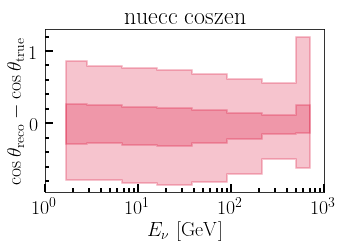

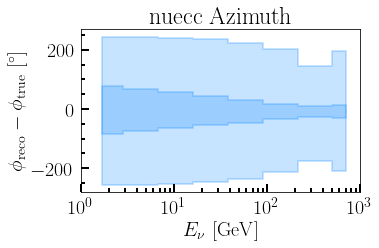

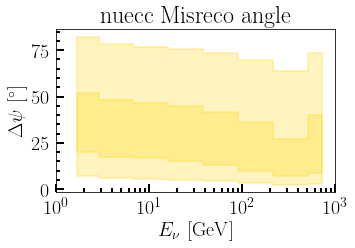

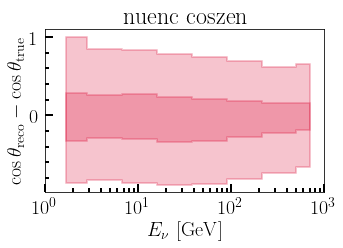

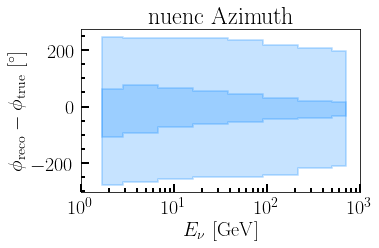

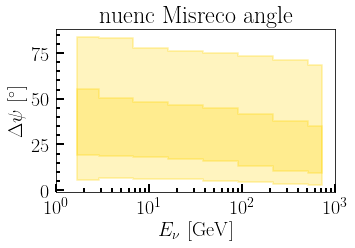

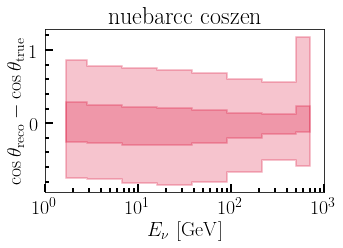

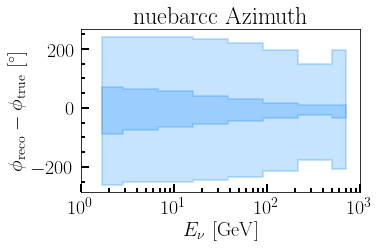

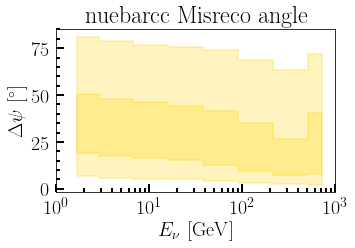

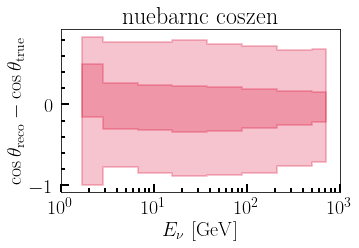

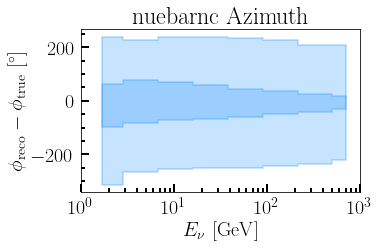

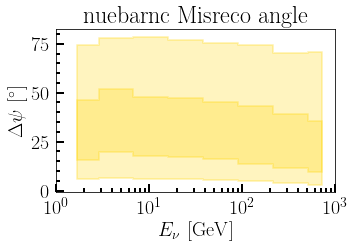

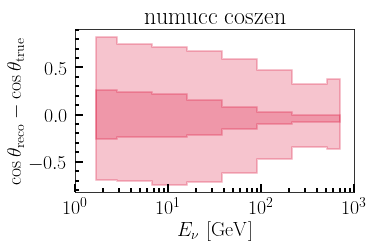

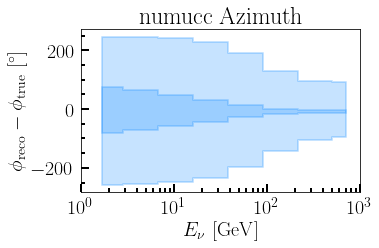

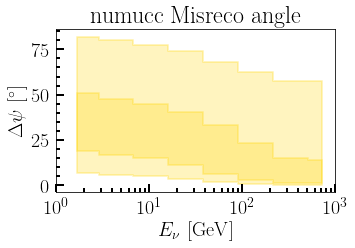

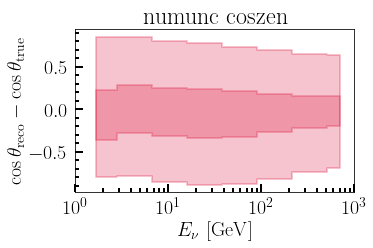

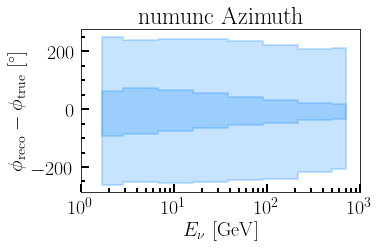

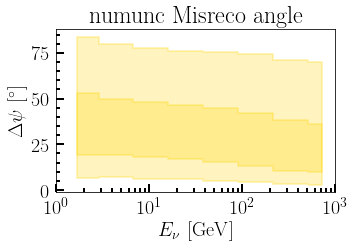

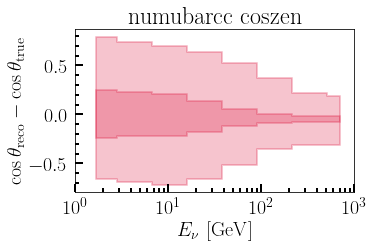

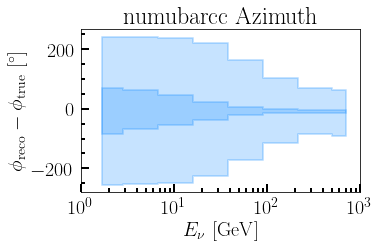

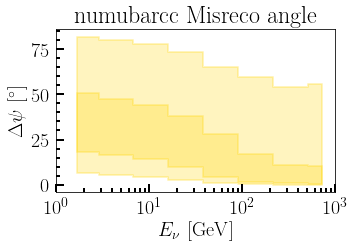

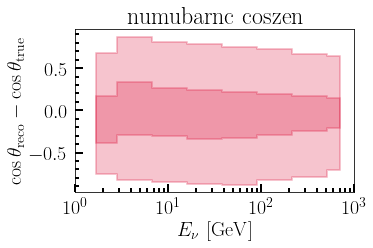

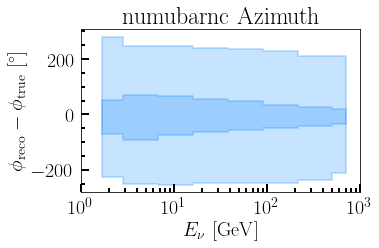

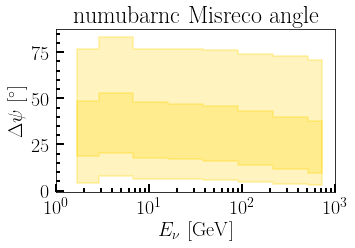

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


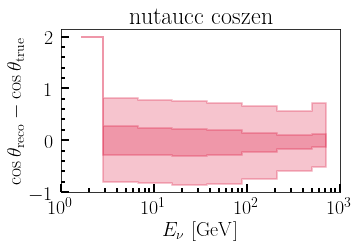

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


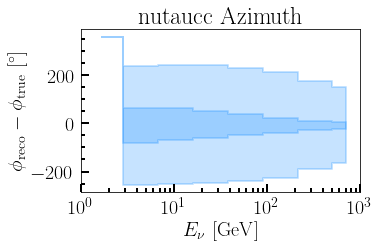

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


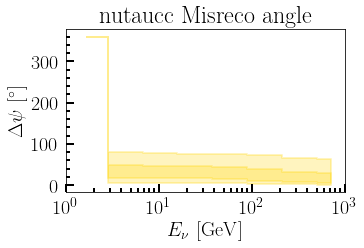

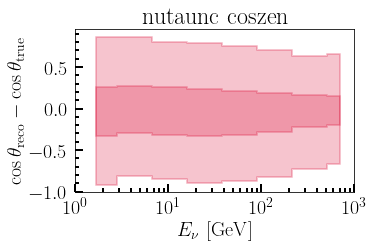

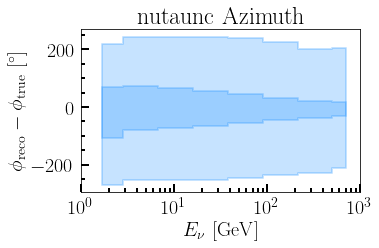

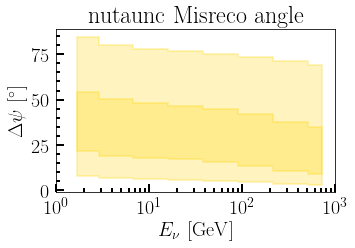

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


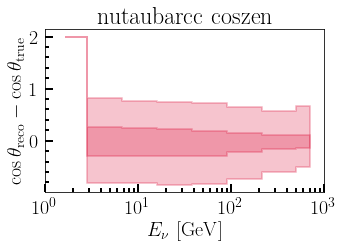

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


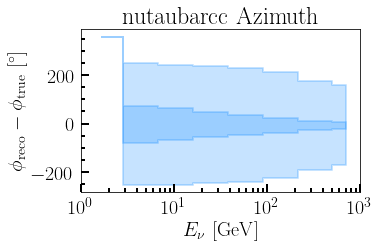

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


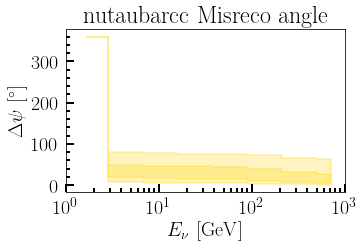

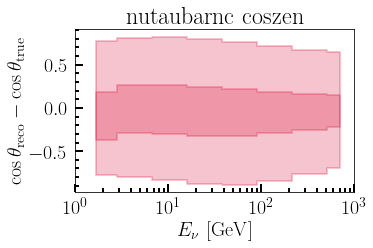

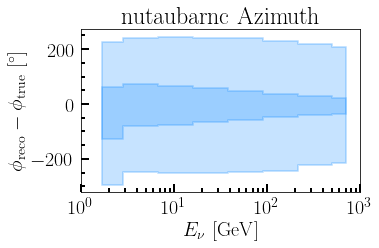

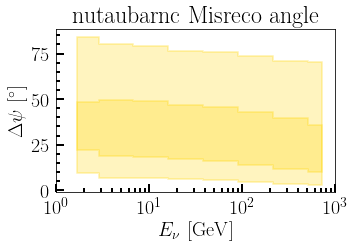

In [162]:
for key in h5f.keys():
    reco_zen = h5f[key]['L7_reconstructed_coszen'][()]
    true_zen = h5f[key]['MCInIcePrimary.dir.coszen'][()]
    reco_az  = h5f[key]['L7_reconstructed_azimuth'][()]
    true_az  = h5f[key]['MCInIcePrimary.dir.azimuth'][()]
    # op       = opening_angle.opening_angle(true_zen, true_az, reco_zen, reco_az)
    e        = h5f[key]['MCInIcePrimary.energy'][()]
    ee = np.logspace(0,3,9)
    psctt = []
    for emin, emax in zip(ee[:-1], ee[1:]):
        m = np.where(np.logical_and(e>emin, e<emax))[0]

        czz = np.linspace(-2,2)
        cents = (czz[:-1]+czz[1:])/2
        mis_reco = reco_zen[m]-true_zen[m]
        h, _ = np.histogram(reco_zen[m]-true_zen[m], bins=czz)
        
        spl = UnivariateSpline(cents, np.cumsum(h)/np.sum(h), s=0.0001)
        _ = []
        for q in [0.05, 0.25, 0.75, 0.95]:
            f = lambda x: spl(x)-q
            _.append(ridder(f, -2,2))
        psctt.append(_)
    psctt = np.array(psctt)
    cee = (ee[:-1]+ee[1:])/2
    plt.fill_between(cee, np.array(psctt[:,0]),np.array(psctt[:,3]), step='mid', color='crimson', alpha=0.25)
    plt.fill_between(cee, np.array(psctt[:,1]),np.array(psctt[:,2]), step='mid', color='crimson', alpha=0.25)
    plt.xlim(1,1e3)
    plt.title(key.replace('_', '')+' coszen')
    plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
    plt.ylabel(r'$\cos\theta_{\rm{reco}}-\cos\theta_{\rm{true}}$')
    plt.semilogx()
    plt.show()

    ee = np.logspace(0,3,9)
    psctt = []
    for emin, emax in zip(ee[:-1], ee[1:]):
        m = np.where(np.logical_and(e>emin, e<emax))[0]

        czz = np.linspace(-2*np.pi,2*np.pi,)
        cents = (czz[:-1]+czz[1:])/2
        h, _ = np.histogram(reco_az[m]-true_az[m], bins=czz)
        spl = UnivariateSpline(cents, np.cumsum(h)/np.sum(h), s=0.0001)
        _ = []
        for q in [0.05, 0.25, 0.75, 0.95]:
            f = lambda x: spl(x)-q
            _.append(ridder(f, -2*np.pi,2*np.pi))
        psctt.append(_)
    psctt = np.array(np.degrees(psctt))
    cee = (ee[:-1]+ee[1:])/2
    plt.fill_between(cee, np.array(psctt[:,0]),np.array(psctt[:,3]), step='mid', color='dodgerblue', alpha=0.25)
    plt.fill_between(cee, np.array(psctt[:,1]),np.array(psctt[:,2]), step='mid', color='dodgerblue', alpha=0.25)
    plt.xlim(1,1e3)
    plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
    plt.title(key.replace('_', '')+' Azimuth')
    plt.ylabel(r'$\phi_{\rm{reco}}-\phi_{\rm{true}}\,\left[^{\circ}\right]$')
    plt.semilogx()
    plt.show()

    ee = np.logspace(0,3,9)
    psctt = []
    for emin, emax in zip(ee[:-1], ee[1:]):
        m = np.where(np.logical_and(e>emin, e<emax))[0]

        czz = np.linspace(0,2*np.pi,1000)
        cents = (czz[:-1]+czz[1:])/2
        op = opening_angle.opening_angle(true_zen[m], true_az[m], reco_zen[m], reco_az[m],)
        h, _ = np.histogram(op, bins=czz)
        spl = UnivariateSpline(cents, np.cumsum(h)/np.sum(h), s=0.0001)
        _ = []
        for q in [0.05, 0.25, 0.75, 0.95]:
            f = lambda x: spl(x)-q
            _.append(ridder(f, 0,2*np.pi))
        psctt.append(_)
    psctt = np.array(np.degrees(psctt))
    cee = (ee[:-1]+ee[1:])/2
    plt.fill_between(cee, np.array(psctt[:,0]),np.array(psctt[:,3]), step='mid', color='gold', alpha=0.25)
    plt.fill_between(cee, np.array(psctt[:,1]),np.array(psctt[:,2]), step='mid', color='gold', alpha=0.25)
    plt.xlim(1,1e3)
    plt.title(key.replace('_', '')+' Misreco angle')
    plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
    plt.ylabel(r'$\Delta\psi\,\left[^{\circ}\right]$')
    plt.semilogx()
    plt.show()

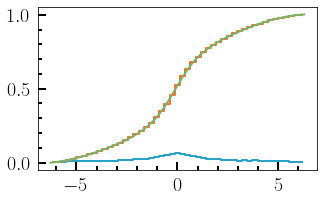

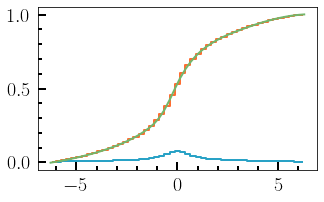

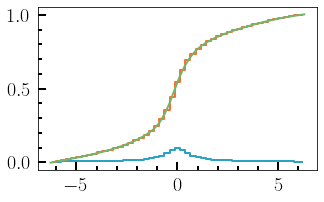

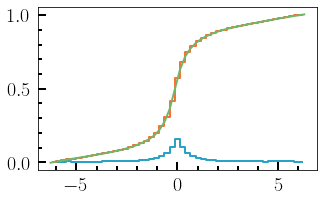

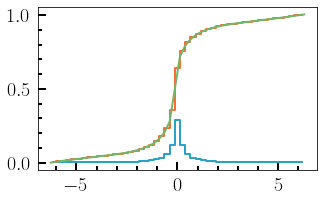

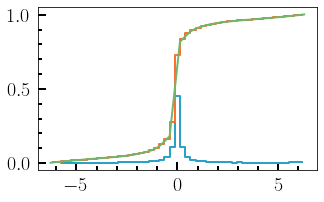

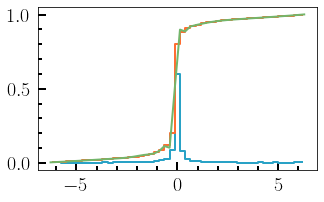

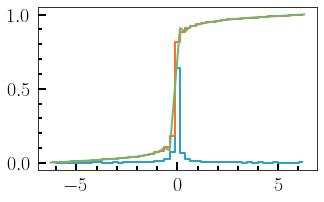

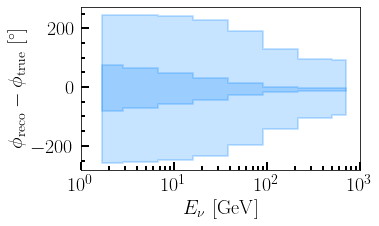

In [149]:
ee = np.logspace(0,3,9)
psctt = []
for emin, emax in zip(ee[:-1], ee[1:]):
    m = np.where(np.logical_and(e>emin, e<emax))[0]

    czz = np.linspace(-2*np.pi,2*np.pi,)
    cents = (czz[:-1]+czz[1:])/2
    h, _ = np.histogram(reco_az[m]-true_az[m], bins=czz)
    plt.step(cents, h/np.sum(h), where='mid')
    plt.step(cents, np.cumsum(h)/np.sum(h), where='mid')
    spl = UnivariateSpline(cents, np.cumsum(h)/np.sum(h), s=0.0001)
    plt.plot(czz, spl(czz))
#     plt.axhline([0.125, 0.25, 0.75, 0.875])
    plt.show()
    _ = []
    for q in [0.05, 0.25, 0.75, 0.95]:
        f = lambda x: spl(x)-q
        _.append(ridder(f, -2*np.pi,2*np.pi))
    psctt.append(_)
psctt = np.array(np.degrees(psctt))
cee = (ee[:-1]+ee[1:])/2
plt.fill_between(cee, np.array(psctt[:,0]),np.array(psctt[:,3]), step='mid', color='dodgerblue', alpha=0.25)
plt.fill_between(cee, np.array(psctt[:,1]),np.array(psctt[:,2]), step='mid', color='dodgerblue', alpha=0.25)
plt.xlim(1,1e3)
plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
plt.ylabel(r'$\phi_{\rm{reco}}-\phi_{\rm{true}}\,\left[^{\circ}\right]$')
plt.semilogx()
plt.show()

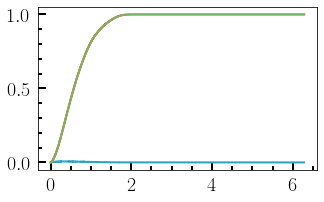

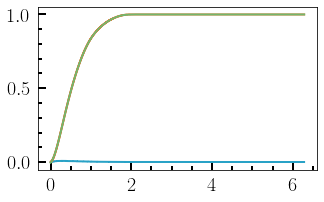

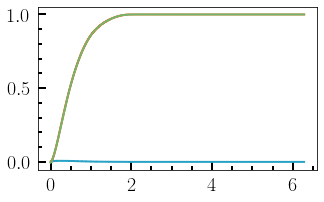

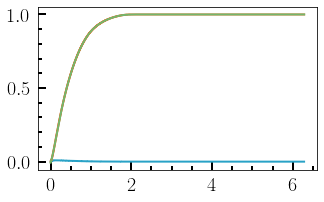

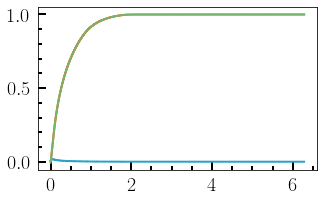

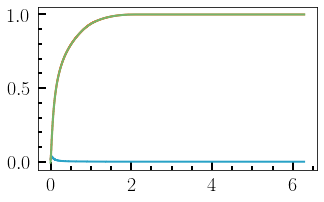

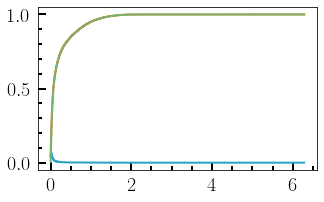

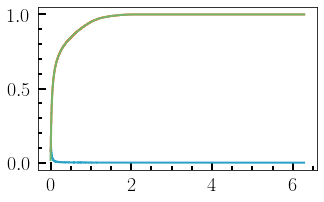

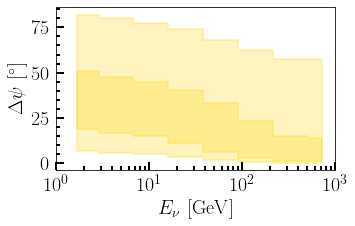

In [159]:
ee = np.logspace(0,3,9)
psctt = []
for emin, emax in zip(ee[:-1], ee[1:]):
    m = np.where(np.logical_and(e>emin, e<emax))[0]

    czz = np.linspace(0,2*np.pi,1000)
    cents = (czz[:-1]+czz[1:])/2
    op = opening_angle.opening_angle(true_zen[m], true_az[m], reco_zen[m], reco_az[m],)
    h, _ = np.histogram(op, bins=czz)
    plt.step(cents, h/np.sum(h), where='mid')
    plt.step(cents, np.cumsum(h)/np.sum(h), where='mid')
    spl = UnivariateSpline(cents, np.cumsum(h)/np.sum(h), s=0.0001)
    plt.plot(czz, spl(czz))
#     plt.axhline([0.125, 0.25, 0.75, 0.875])
    plt.show()
    _ = []
    for q in [0.05, 0.25, 0.75, 0.95]:
        f = lambda x: spl(x)-q
        _.append(ridder(f, 0,2*np.pi))
    psctt.append(_)
psctt = np.array(np.degrees(psctt))
cee = (ee[:-1]+ee[1:])/2
plt.fill_between(cee, np.array(psctt[:,0]),np.array(psctt[:,3]), step='mid', color='gold', alpha=0.25)
plt.fill_between(cee, np.array(psctt[:,1]),np.array(psctt[:,2]), step='mid', color='gold', alpha=0.25)
plt.xlim(1,1e3)
plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
plt.ylabel(r'$\Delta\psi\,\left[^{\circ}\right]$')
plt.semilogx()
plt.show()

In [119]:
np.array(psctt)

array([[-5.53745660e-01, -3.16170274e-01,  1.60300115e-01,
         3.64758771e-01],
       [-5.24497752e-01, -2.95436693e-01,  1.63706287e-01,
         3.76723108e-01],
       [-4.50315958e-01, -2.34458991e-01,  1.26952444e-01,
         3.40664216e-01],
       [-3.06579179e-01, -1.34461429e-01,  4.28954019e-02,
         1.98802709e-01],
       [-1.94656332e-01, -8.79343272e-02,  5.17392795e-03,
         9.55752658e-02],
       [-1.00973238e-01, -7.24131772e-02, -6.70779160e-03,
         2.50493978e-02],
       [-3.31826870e-01, -8.30267083e-02, -6.60786231e-04,
         1.53715616e-01],
       [-7.97507246e-01, -4.65458145e-01,  2.69205408e-02,
         2.17030155e-01]])

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


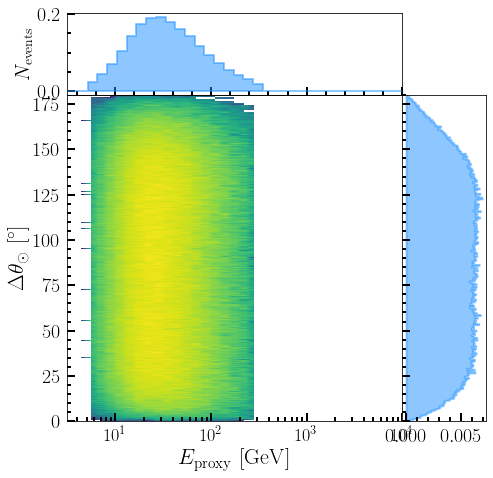

In [58]:
# sig = livetime*np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_IC86_pass2_MC_00.npy')
sig_le = 8/9*livetime*np.sum(np.load('/data/user/jlazar/solar/data/distributions/SIBYLL2.3_pp_HillasGaisser_H4a_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
# sig_le = 8/9*livetime*np.sum(np.load('/data/user/jlazar/solar/data/distributions/ch5-m500_1AU_BRW_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)

fig = plt.figure(figsize=(7.5, 7.5))
gs = GridSpec (2, 2, width_ratios=[4,1], height_ratios=[1,4])
gs.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
(ax1, ax2, ax3) = (fig.add_subplot(gs[2]), fig.add_subplot(gs[3]), fig.add_subplot(gs[0]))
im = ax1.imshow(
                np.log10(sig_le)[::-1], 
#                 np.log10(sig+sig_le)[::-1], 
                aspect='auto',
                extent=[0,6,0,180],
                cmap='viridis'
               )
sort_out_log_axes(ax1, im, logy=False)

# xtick_pos = [0,1,2,3,4,5]
# ax1.set_xticklabels([r'$10^{%d}$' % x for x in ytick_pos])
# ax1.set_xticks(ytick_pos)
ax1.set_xlabel(r'$E_{\rm{proxy}}\,\left[\rm{GeV}\right]$', fontsize=22)
ax1.set_ylabel(r'$\Delta\theta_{\odot}\,\left[^{\circ}\right]$', fontsize=22)
ax1.set_xlim(0.5, 4)
ax1.set_ylim(0,180)

ax2.set_yticklabels([])
ax2.set_ylim(ax1.get_ylim())
# ax2.semilogx()
ax2.fill_betweenx(np.linspace(0,180,359), 0, np.sum(sig_le, axis=1), alpha=0.5, step='post', color='dodgerblue')
# ax2.fill_betweenx(np.linspace(0,180,359), np.sum(sig_le, axis=1), np.sum(sig_le, axis=1)+np.sum(sig, axis=1), alpha=0.5, step='post', color='crimson')


ax3.fill_between(np.linspace(0,6,60), np.sum(sig_le, axis=0), alpha=0.5, step='post', color='dodgerblue', zorder=10)
# ax3.fill_between(np.linspace(0,6,60), np.sum(sig_le, axis=0), np.sum(sig_le, axis=0)+np.sum(sig, axis=0), alpha=0.5, step='post', color='crimson')
ax3.set_xticklabels([])
ax3.set_ylabel(r'$N_{\rm{events}}$')
ax3.set_xlim(ax1.get_xlim())

# plt.savefig('/data/user/jlazar/solar/plots/event_distributions/ch5-m500_tot_events_combined.pdf')
plt.show()

In [45]:
np.load('/data/user/jlazar/solar/data/data_realizations_scramble/background_11.npy')

array([-2.03316260e-04,  2.70484966e-01,  7.10958404e-01, ...,
        1.37074438e-01,  2.27828703e+00,  1.92517660e+00])

In [1]:
import h5py as h5

In [2]:
h5f = h5.File('/data/user/jlazar/solar/solar_WIMP_v2/processing/oscNext/vJeff/oscNext_pisa_genie_0000_vJeff.hdf5', 'r')

In [4]:
a = h5f['nue_cc']
for key in a.keys():
    if 'az' in key.lower():
        print(key)

L7_reconstructed_azimuth
MCInIcePrimary.dir.azimuth


In [11]:
oscNext = MCReader('/data/user/jlazar/solar/solar_WIMP_v2/processing/oscNext/vJeff/oscNext_pisa_genie_0000_vJeff.hdf5')

In [72]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../paper.mplstyle')
dist = np.sum(np.load('/data/user/jlazar/solar/data/distributions/for_gerrit/SIBYLL2.3_pp_HillasGaisser_H4a_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
print(np.sum(dist)*8*10**7.5)

0.013260495068234431


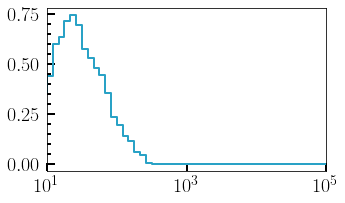

/home/jlazar/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2938: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/jlazar/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2938: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


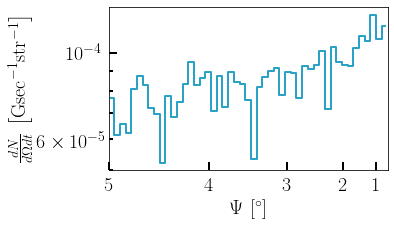

/home/jlazar/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2938: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/jlazar/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2938: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


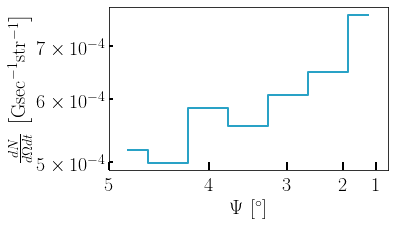

In [76]:
fig, ax = plt.subplots(figsize=(5,3))

ax.step(np.logspace(1, 5, 49), 1e9*np.sum(dist, axis=0)/0.007136047354445285)
ax.set_xlim(10, 1e5)
ax.semilogx()
plt.show()

arr = np.sum(dist, axis=1)

edges = np.linspace(np.cos(np.radians(5)), 1, 50)
cents = (edges[:-1]+edges[1:])/2.
widths = edges[1:]+edges[:-1]

fig, ax = plt.subplots(figsize=(5,3))

ax.step(cents, 1e9*arr[::-1]/widths/2/np.pi, where='mid')
ax.semilogy()
ax.set_xticks(np.cos(np.radians([1,2,3,4,5])))
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.set_xlabel(r'$\Psi\,\left[^{\circ}\right]$')
ax.set_xlim(np.cos([np.radians(5), 0]))
ax.set_xlabel(r'$\Psi\,\left[^{\circ}\right]$')
ax.set_ylabel(r'$\frac{dN}{d\Omega dt}\,\left[\rm{Gsec}^{-1}\rm{str}^{-1}\right]$')
plt.show()

arr = np.sum(dist, axis=1)
r   = []
for i in range(7):
    r.append(np.sum(arr[i*7:(i+1)*7]))
r = np.array(r)[::-1]

edges = np.linspace(np.cos(np.radians(5)), 1, 8)
cents = (edges[:-1]+edges[1:])/2.
widths = edges[1:]+edges[:-1]
fig, ax = plt.subplots(figsize=(5,3))

ax.step(cents, 1e9*r/widths/2/np.pi, where='mid')
ax.semilogy()
ax.set_xticks(np.cos(np.radians([1,2,3,4,5])))
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.set_xlim(np.cos([np.radians(5), 0]))
ax.set_xlabel(r'$\Psi\,\left[^{\circ}\right]$')
ax.set_ylabel(r'$\frac{dN}{d\Omega dt}\,\left[\rm{Gsec}^{-1}\rm{str}^{-1}\right]$')
plt.show()

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


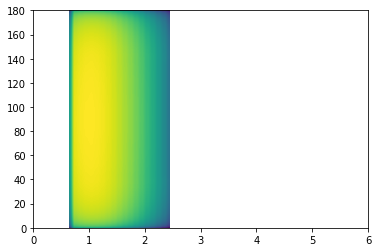

In [45]:
dist=2.976*np.sum(np.load('/data/user/jlazar/solar/data/distributions/sibyll23c_conv_oscNext_pisa_genie_0000_vJeff_00.npy'), axis=2)
plt.imshow(np.log(dist), aspect='auto', extent=[0,6,0,180])
plt.show()